In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [10]:
# Zmiana obszaru roboczego
os.chdir(r'C:\aa_sem_i\PiPG_I\temat_7\dane_wejsciowe')
#wczytanie obrazu Ziemi
img = plt.imread('_earth.jpg')

# Dane wejściowe 1
PRN = 9
health = 0
e = 0.000644
a = 5153.6**2
Om_0 = 38.596
om = 120.031
M_0 = -79.889

T = 233472  # Moment czasu T - on jest nie potrzbny do obliczen, ponieważ
            # wyznaczamy współrzędne satelity na podstawie parametrów, a nie parametry
    
i = (0.7491+54) # Podane i-54°
OMEGAdot = -0.0004518
a_0 = 0.0
a_1 = 0.00
week = 1892

# Stałe systemu GRS-80
GM =  3986005*10**8
om_e = 7292115*10**-11

In [11]:
# obliczenia
def data(a, e, i, M_0, Om_0, om):
    # a - półoś wielka
    # e - mimośród
    # i - nachylenie orbity
    # om - argument perigeum
    # OM_0 - długość węzła wstępującego
    # M_0 - anomalia mimośrodowa

    ro = np.pi/180
    
    i *= ro
    M_0 *= ro
    Om_0 *= ro
    om *= ro
    
    dt = 0
    
    n = np.sqrt(GM / a ** 3) # ruch satelity
    M = M_0 + n * dt # anomalia średnia

    def obl_E(E, E0, M, e):
        while abs(E - E0) > 10 ** -3:
            E0 = E
            E = M + e * np.sin(E)
        return E
    
    E = obl_E(0, 0.2, M, e) # anomalia mimośrodowa
    
    v = np.arctan2(np.sqrt(1 - e ** 2) * np.sin(E), np.cos(E) - e) # anomalia prawdziwa
    u = v + om # azrgument szerokości
    r = a * (1 - e * np.cos(E)) # promień wodzący satelity
    
    # Współrzędne satelity w płaszczyźnie orbity
    xp = r * np.cos(u)
    yp = r * np.sin(u)
    
    OM = Om_0 - om_e * dt # rektascenzja węzła zstępującego
    
    # Współrzędne satelity w układzie geocentrycznym
    xs = xp * np.cos(OM) - yp * np.cos(i) * np.sin(OM)
    ys = xp * np.sin(OM) + yp * np.cos(i) * np.cos(OM)
    zs = yp * np.sin(i)

    # przeliczenie współrzędnych x, y, z satelity na ϕ, λ punktu podsatelitarnego
    ro = 180 / np.pi
    p = np.sqrt(xs * xs + ys * ys)
    fis = ro * np.arctan2(zs, p)
    las= ro * np.arctan2(ys, xs)
    
    return xs,ys,zs,fis,las # [m], [°]

In [12]:
xs,ys,zs,fis,las = data(a, e, i, M_0, Om_0, om)

[[-90 -89 -88 ...  88  89  90]
 [-90 -89 -88 ...  88  89  90]
 [-90 -89 -88 ...  88  89  90]
 ...
 [-90 -89 -88 ...  88  89  90]
 [-90 -89 -88 ...  88  89  90]
 [-90 -89 -88 ...  88  89  90]]
[[     -0.         -111189.28141193 -222344.69349163 ... -222344.69349163
  -111189.28141193      -0.        ]
 [     -0.         -111172.34674582 -222310.82931786 ... -222310.82931786
  -111172.34674582      -0.        ]
 [     -0.         -111121.54790593 -222209.24711191 ... -222209.24711191
  -111121.54790593      -0.        ]
 ...
 [     -0.         -111121.54790593 -222209.24711191 ... -222209.24711191
  -111121.54790593      -0.        ]
 [     -0.         -111172.34674582 -222310.82931786 ... -222310.82931786
  -111172.34674582      -0.        ]
 [     -0.         -111189.28141193 -222344.69349163 ... -222344.69349163
  -111189.28141193      -0.        ]]


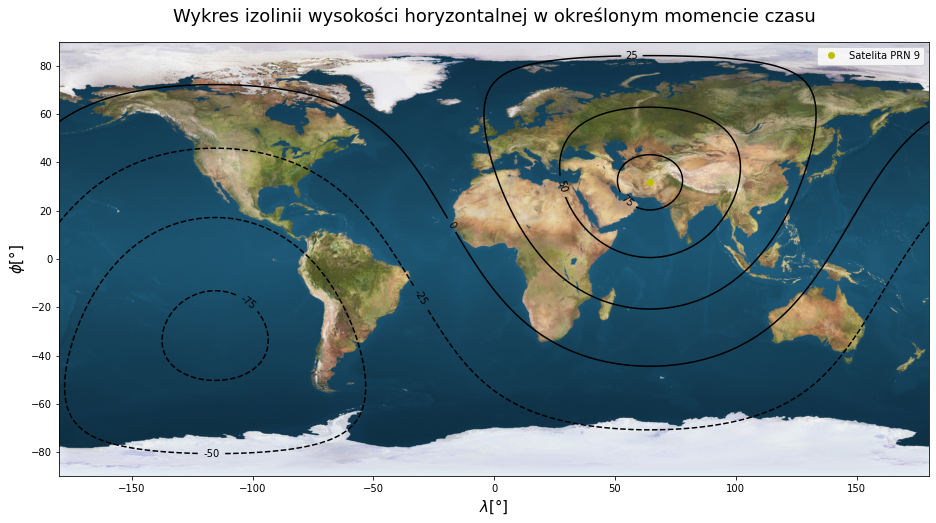

In [13]:
ro = np.pi/180
R = 6371000

fi = np.arange(-90,91)
la = np.arange(-180,181)

fi, la = np.meshgrid(fi,la)
print(fi)
fi, la = fi*ro, la*ro

xp = R*np.cos(fi)*np.cos(la)
print(xp)
yp = R*np.cos(fi)*np.sin(la)
zp = R*np.sin(fi)

np.set_printoptions(suppress=True)
# Obliczenia
def obl_e(xs,ys,zs, xp, yp, zp):

    ro = 180/np.pi

    r = np.sqrt(xs**2+ys**2+zs**2)
    d = np.sqrt((xs-xp)**2 + (ys-yp)**2 + (zs-zp)**2)
    e = np.arcsin((r**2-R**2-d**2)/(2*R*d))
    
    return e*ro

e = obl_e(xs,ys,zs, xp, yp, zp)


plt.figure(figsize=(16,8))
plt.title('Wykres izolinii wysokości horyzontalnej w określonym momencie czasu',fontsize = 18, pad = 20)
plt.xlabel('$\lambda [°]$',fontsize = 15)
plt.ylabel('$\phi [°]$', fontsize = 15)
#skalowanie tla
plt.imshow(img, extent=(-180,180,-90,90))
CS = plt.contour(la/ro, fi/ro, e, colors = 'black')
plt.clabel(CS, inline=True, fontsize=10, fmt='%1.0f')
plt.plot(las,fis, 'oy', label = 'Satelita PRN 9')
plt.legend()
plt.savefig('sat_9.jpg', dpi = 100)
plt.show()

In [14]:
# Dane wejściowe 2
PRN = 45
health = 0
e = 0.001801
a = 5050.5**2
Om_0 = 7.371
om = -81.974
M_0 = 81.752
t_0 = 521331
i = 10.5348+54
OMEGAdot = -0.0003890
a_0 = 0.0
a_1 = 0.00
week = 1891

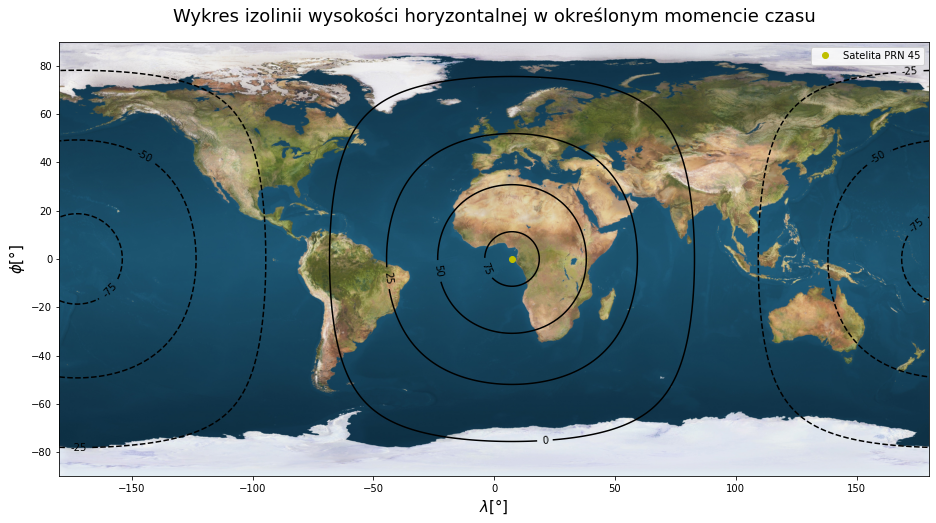

In [15]:
xs,ys,zs,fis,las = data(a, e, i, M_0, Om_0, om)
e = obl_e(xs,ys,zs, xp, yp, zp)
plt.figure(figsize=(16,8))
plt.title('Wykres izolinii wysokości horyzontalnej w określonym momencie czasu',fontsize = 18, pad = 20)
plt.xlabel('$\lambda [°]$',fontsize = 15)
plt.ylabel('$\phi [°]$', fontsize = 15)
#skalowanie tla
plt.imshow(img, extent=(-180,180,-90,90))
CS = plt.contour(la/ro, fi/ro, e, colors = 'black')
plt.clabel(CS, inline=True, fontsize=10, fmt='%1.0f')
plt.plot(las,fis, 'oy', label = 'Satelita PRN 45')
plt.legend()
plt.savefig('sat_45.jpg', dpi = 100)
plt.show()